# 1

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 
brf = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', delimiter = '\t')
brf

# 2

In [22]:
#2. Use the least squares method to fit a model to this data. 
N, i = np.shape(brf)
t = brf[:,0:1]
dobs = brf[:,1:2]

M = 4
G = np.zeros((N,M))
G[0:N,0:1] = np.ones((N,1))
G[0:N,1:2] = t
G[0:N,2:3] = t**2
G[0:N,3:4] = t**3

GTG = np.matmul(G.T,G)
GTd = np.matmul(G.T, dobs)
mest = np.linalg.lstsq(GTG,GTd, rcond = None)[0]
dpre = np.matmul(G,mest)
e = dobs - dpre
sigmad2 = np.matmul(e.T, e) / (N-M)
Cd = sigmad2 * np.linalg.inv(GTG)
sm = np.sqrt(np.diag(Cd).reshape(-1,1))

print("estimated standard deviation of the data: " + str(np.sqrt(sigmad2)))
print("estimated solution of model parameters: ")
for k in range(M):
    print("model parameter %d: %.4f +/- %.4f" %(k, mest[k,0], 2.0*sm[k,0]))

estimated standard deviation of the data: [[5.8341739]]
estimated solution of model parameters: 
model parameter 0: -0.0002 +/- 0.4993
model parameter 1: -0.0094 +/- 0.0119
model parameter 2: 0.0012 +/- 0.0001
model parameter 3: -0.0000 +/- 0.0000


In [51]:
from scipy import optimize
def cubicfunc(x, a, b, c, d):
    y = a*x + b*x**2 + c*x**3 +d
    return y

mest_ez = optimize.curve_fit(cubicfunc, xdata = brf[:,0], ydata = brf[:,1])[0]
mest_ez

array([ 1.44401630e-01,  3.48483980e-04, -2.08041857e-06, -7.45702953e+00])

# 3

In [39]:
P = (2 * np.pi)/365.25

def trigfunc(x, a, b, c):
    y = a* np.cos(P*x) + b*np.sin(P*x) + c
    return y

mest_ez = optimize.curve_fit(trigfunc, xdata = brf[:,0], ydata = brf[:,1])[0]
a = mest_ez[0]
b = mest_ez[1]
c = mest_ez[2]
dpre = a* np.cos(P*t) + b*np.sin(P*t) + c

# 4

In [49]:
D = np.sqrt(a**2 + b**2)
D

12.34556192685458

# 5

In [50]:
t_max = max(t)
t_max

array([365.25])

# 6 

Text(0.5, 1.0, 'prediction error')

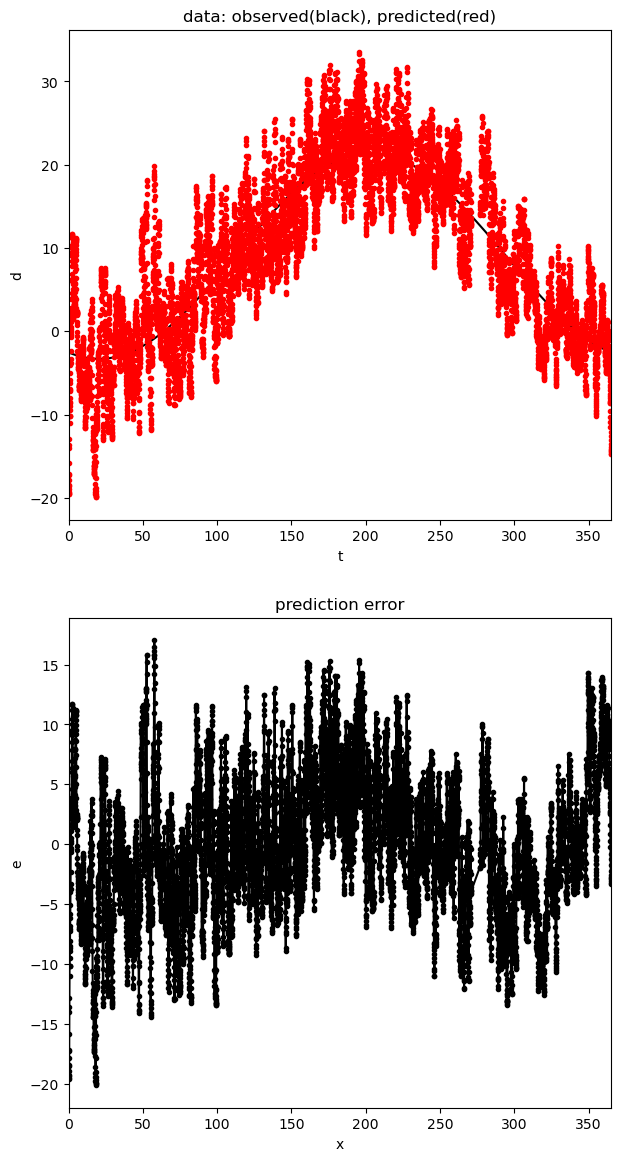

In [52]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (7,14) )
ax[0].margins(x = 0)
ax[0].plot(t,dpre, 'k-')
ax[0].plot(t, dobs, 'r.')
ax[0].set_xlabel('t')
ax[0].set_ylabel('d')
ax[0].set_title("data: observed(black), predicted(red)")

ax[1].margins(x = 0)
ax[1].plot(t,e, 'k.-')
ax[1].set_xlabel('x')
ax[1].set_ylabel('e')
ax[1].set_title("prediction error")